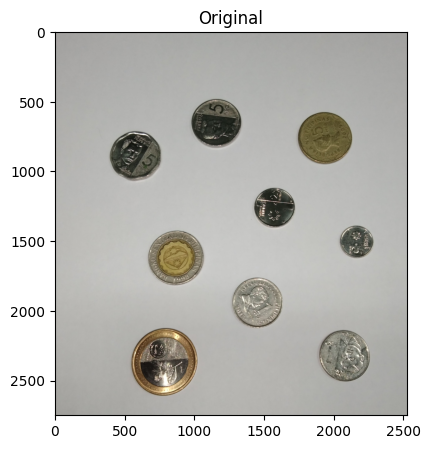

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread("img.jpeg")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plt.imshow()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Increase contrast
alpha = 1.5  # Contrast control
beta = -1      # Brightness control
contrasted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Display images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image_rgb[:2750]), plt.title("Original")
# plt.subplot(1,2,2), plt.imshow(contrasted), plt.title("High Contrast")
plt.show()


(2750, 2528)


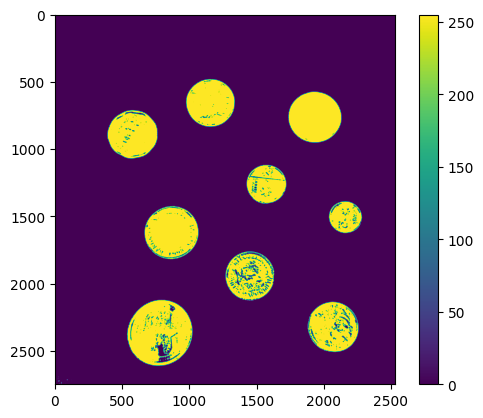

In [48]:
image = contrasted 
image = np.array(image)
image = image[:2750,:,0]
final_masked = np.where(image>230, 0, 255)
plt.imshow(final_masked[:,:])
plt.colorbar()
print(image.shape)

(450, 460)


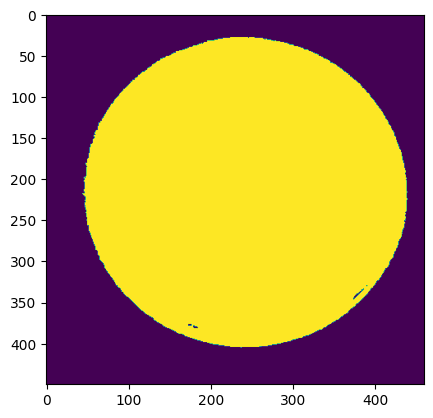

In [49]:
plt.imshow(final_masked[550:1000,1690:2150])
peso_5 = final_masked[700:1100,300:800]
peso_1 = final_masked[1100:1450,1400:1750]
peso_better_5 = final_masked[550:1000,1690:2150]
print(peso_better_5.shape)

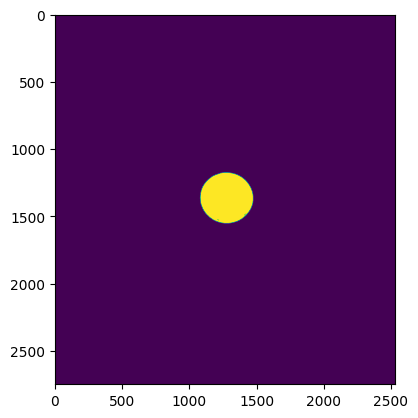

In [59]:
bkg_with_5_c = np.zeros(shape = image.shape)
center = (image.shape[0]//2, image.shape[1]//2)
to_center_y = peso_better_5.shape[0]//2
to_center_x = peso_better_5.shape[1]//2
bkg_with_5_c[center[0]-to_center_y:center[0]+to_center_y,center[1]-to_center_x:center[1]+to_center_x] = peso_better_5
plt.imshow(bkg_with_5_c)

In [57]:
def getCorrelations(test_img, letter_scaled):
    img_fft = np.fft.fftshift(np.fft.fft2(test_img))
    letter_fft = np.fft.fftshift(np.fft.fft2(letter_scaled))
    
    convolved_fft = letter_fft*np.conj(img_fft)
    
    correlations_img = np.abs(np.fft.fftshift(np.fft.fft2(convolved_fft)))
    correlations_MinMax = 1- (np.max(correlations_img) - correlations_img)/(np.max(correlations_img) - np.min(correlations_img))
    
    return correlations_MinMax

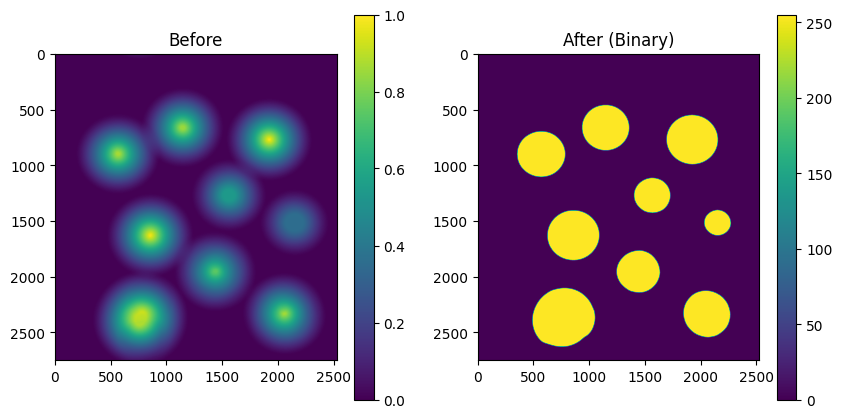

In [60]:
correl_MinMax = getCorrelations(final_masked, bkg_with_5_c)
# correl_MinMax_binary = np.where(correl_MinMax>0.3, 1, 0)
# plt.imshow(correl_MinMax_binary)
# plt.imshow(correl_MinMax)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(correl_MinMax), plt.title("Before")
plt.colorbar()
plt.subplot(1,2,2), plt.imshow(correl_MinMax_binary), plt.title("After (Binary)")
plt.colorbar()
plt.show()

In [33]:
# Ensure the image is in grayscale
if len(correl_MinMax_binary.shape) == 3:  # If it has 3 channels (BGR), convert to grayscale
    correl_MinMax_binary = cv2.cvtColor(correl_MinMax_binary, cv2.COLOR_BGR2GRAY)

# Normalize and convert to uint8 (8-bit)
correl_MinMax_binary = cv2.normalize(correl_MinMax_binary, None, 0, 255, cv2.NORM_MINMAX)
correl_MinMax_binary = correl_MinMax_binary.astype(np.uint8)

ret, thresh = cv2.threshold(correl_MinMax_binary, 200, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Area: 135650.5 135650.5
center: 2051,  2336
Area: 230329.5 230329.5
center: 764,  2369
Area: 112964.0 112964.0
center: 1437,  1957
Area: 162149.0 162149.0
center: 854,  1631
Area: 41529.0 41529.0
center: 2147,  1519
Area: 78927.0 78927.0
center: 1561,  1274
Area: 136855.0 136855.0
center: 566,  904
Area: 158422.0 158422.0
center: 1920,  775
Area: 133830.5 133830.5
center: 1143,  667


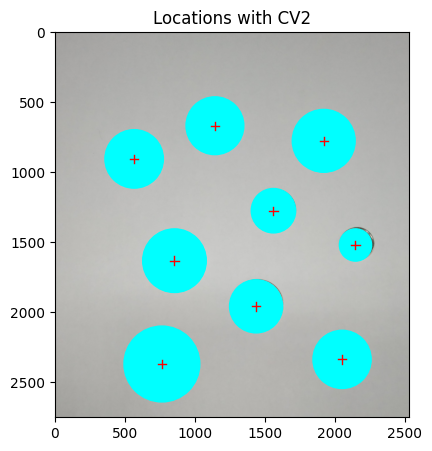

In [62]:
import matplotlib.patches as patches
image = cv2.imread("img.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(image[:2750])

for c in contours:
    M = cv2.moments(c)
    area = cv2.contourArea(c)
    area_2 = M["m00"]
    if area < 100:
        continue
    print("Area: " + str(area), area_2)
    if M["m00"] == 0:
        continue
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
    print("center: "+ str(cX) + ", ", str(cY))

    circle = patches.Circle((cX, cY), radius=np.sqrt(area_2/np.pi), color='cyan', fill=True)  # Adjust radius if needed
    ax.add_patch(circle)
    # Add text label for coordinates
    # Add "+" symbol
    l = 30
    ax.plot([cX - l, cX + l], [cY, cY], color='red', linewidth=1)  # Horizontal line
    ax.plot([cX, cX], [cY - l, cY + l], color='red', linewidth=1)  # Vertical line

plt.title("Locations with CV2")
plt.show()
